In [2]:
from salishsea_tools import LiveOcean_BCs as nancy

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import scipy as sc
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
import gsw
from seabird.cnv import fCNV
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.io
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from eofs.standard import Eof

from dateutil        import parser
from datetime import datetime


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
date = '2013-08-20'
d = nancy.load_LiveOcean(date)

In [4]:
d.keys()

KeysView(<xarray.Dataset>
Dimensions:        (eta_rho: 31, eta_u: 31, eta_v: 30, ocean_time: 1, s_rho: 40, xi_rho: 26, xi_u: 25, xi_v: 26)
Coordinates:
    lon_rho        (eta_rho, xi_rho) float64 -125.0 -125.0 -125.0 -124.9 ...
    lat_rho        (eta_rho, xi_rho) float64 48.32 48.32 48.32 48.32 48.32 ...
  * s_rho          (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
  * ocean_time     (ocean_time) datetime64[ns] 2013-08-20T12:00:00
    lon_u          (eta_u, xi_u) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_u          (eta_u, xi_u) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
    lon_v          (eta_v, xi_v) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_v          (eta_v, xi_v) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
  * eta_rho        (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * xi_rho         (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * eta_u          (eta_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 

In [5]:
live_lon = d.variables['lon_rho']
live_lat = d.variables['lat_rho']

live_rho = d.variables['rho']
live_sal = d.variables['salt']
live_temp =d.variables['temp']

In [24]:
# bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

bathy = nc.Dataset('/data/ssahu/WCVI_sliced_bathy_NEP36_original.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))

# z_wcvi = Z[y_wcvi_slice, x_wcvi_slice]
lon_wcvi = bathy['nav_lon']#[180:350, 480:650]
lat_wcvi = bathy['nav_lat']#[180:350, 480:650]


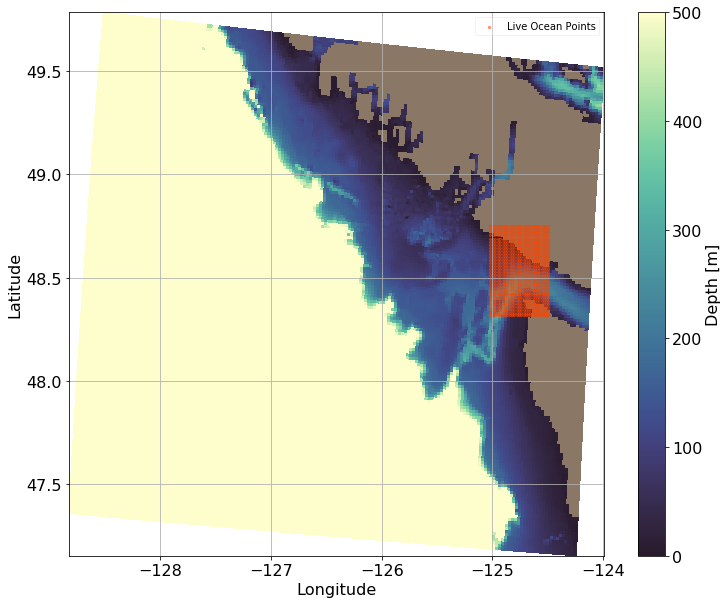

In [7]:


# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

cmap = cmo.cm.deep_r
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); ax.grid()

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')


# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

ax.scatter(live_lon, live_lat, c='orangered',s =5,  alpha=0.5, label = 'Live Ocean Points')

legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)

cbar.ax.set_ylabel('Depth [m]', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

# plt.tight_layout(pad=0, w_pad=0, h_pad=0)

path_to_save = '/home/ssahu/saurav/NEP36_Model_Eval_plots/'
plt.savefig(path_to_save + 'Domain.png')

In [7]:
live_rho[0,:,0,0]

<xarray.Variable (s_rho: 40)>
array([ 27.67589951,  27.65503311,  27.63434029,  27.61356163,
        27.59288788,  27.57277489,  27.55282974,  27.53251839,
        27.51113701,  27.48803711,  27.4625473 ,  27.43375969,
        27.40130806,  27.36433983,  27.32182312,  27.27569389,
        27.2243576 ,  27.16307831,  27.08737946,  26.99538422,
        26.89031219,  26.76848793,  26.62510681,  26.46365929,
        26.27536774,  26.08022499,  25.8593483 ,  25.60749245,
        25.35406876,  25.07568169,  24.75859642,  24.40962219,
        24.05430031,  23.78596115,  23.59705734,  23.48993492,
        23.42627907,  23.39375114,  23.37819099,  23.3727169 ])
Attributes:
    long_name: density anomaly
    units: kilogram meter-3
    time: ocean_time
    grid: grid
    location: face
    field: density, scalar, series

In [8]:
SA_live = np.empty_like(live_sal)
CT_live = np.empty_like(live_temp)
spic_live = np.empty_like(live_temp)



for t in np.arange(live_temp.shape[0]):
    for k in np.arange(live_temp.shape[1]):

        for j in np.arange(live_temp.shape[2]):

            for i in np.arange(live_temp.shape[3]):

    #             pressure_survey[k,j,i] = gsw.p_from_z(-depths_survey[j],lat_survey[i])

                SA_live[t,k,j,i] = gsw.SA_from_SP(live_sal[t,k,j,i], 0, live_lon[j,i], live_lat[j,i])

                CT_live[t,k,j,i] = gsw.CT_from_pt(live_sal[t,k,j,i], live_temp[t,k,j,i])

                spic_live[t,k,j,i] = gsw.spiciness0(SA_live[t,k,j,i], CT_live[t,k,j,i])

In [9]:
rho_0 = 26.4

spic_rho_live = np.empty((spic_live.shape[0],spic_live.shape[2],spic_live.shape[3]))


for t in np.arange(spic_rho_live.shape[0]):
    for j in np.arange(spic_rho_live.shape[1]):
        for i in np.arange(spic_rho_live.shape[2]):

            spic_loc = spic_live[t,:,j,i]
            rho_loc  = live_rho[t,:,j,i]
            spic_rho_live[t,j,i] = np.interp(rho_0, rho_loc[:], spic_loc[:])

# spic_rho_finite = spic_rho[~np.isnan(spic_rho)]

In [ ]:
np.nanmax(spic_rho)

In [ ]:
plt.pcolormesh(spic_rho[0,...], vmin = -0.1, vmax = 0.1)
plt.colorbar()

In [32]:
path_of_file = '/data/ssahu/Falkor_2013/mvp/'

survey_file_D = path_of_file + 'surveyD.mat'

file = survey_file_D

mat = scipy.io.loadmat(file)

depths_survey = mat['depths'][:,0]
lat_survey = mat['latitude'][:,0]
lon_survey = mat['longitude'][:,0] - 100
# den_survey = mat['density'][:]
pden_survey = mat['pden'][:]
temp_survey = mat['temp'][:]
sal_survey = mat['salinity'][:]
mtime = mat['mtime'][:,0]

(-126, -124.5)

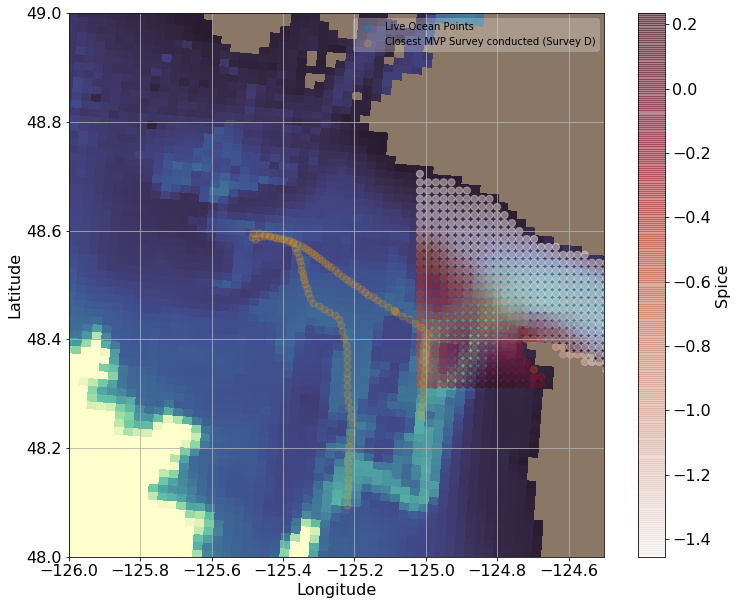

In [36]:


# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

cmap = cmo.cm.deep_r
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); ax.grid()

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
# cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')


# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

q = ax.scatter(live_lon, live_lat, c=spic_rho_live[0,...], cmap = cmo.cm.amp, s=50,  alpha=0.5, label = 'Live Ocean Points')
cbar = fig.colorbar(q, ax=ax)
q = ax.scatter(lon_survey, lat_survey, c='orange', s=50,  alpha=0.2, label = 'Closest MVP Survey conducted (Survey D)')
legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)

# cbar.ax.set_ylabel('Depth [m]', fontsize=16)

cbar.ax.set_ylabel('Spice', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

ax.set_ylim(48,49)
ax.set_xlim(-126,-124.5)

In [56]:
lon_survey_relevant = lon_survey[lon_survey>-125.02]
lat_survey_relevant = lat_survey[lon_survey>-125.02]
temp_survey_relevant = temp_survey[:,lon_survey>-125.02]
sal_survey_relevant = temp_survey[:,lon_survey>-125.02]

In [55]:
temp_survey_relevant.shape

(251, 14)

In [41]:
lon_survey_relevant.shape

(14,)

In [47]:
lon_live_relevant = live_lon[:,0]
lat_live_relevant = live_lat[:,0]

In [35]:
# NEP_T_file = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_T_20130708-20130717.nc')

NEP_T_file = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_T_20130817-20130826.nc')

In [15]:
NEP_temp = NEP_T_file.variables['temp'][3,:,1:,1:]
NEP_sal  = NEP_T_file.variables['salt'][3,:,1:,1:]
NEP_lat  = NEP_T_file.variables['nav_lat'][1:,1:]
NEP_lon  = NEP_T_file.variables['nav_lon'][1:,1:]
depth = NEP_T_file.variables['deptht'][:]


NEP_temp = np.ma.masked_values(NEP_temp, 0)
NEP_sal = np.ma.array(NEP_sal, mask = np.logical_not(NEP_temp))

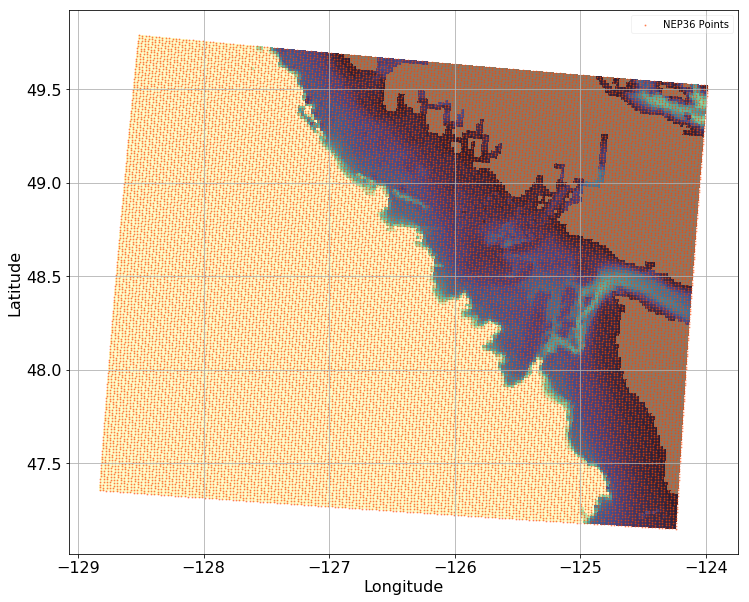

In [19]:


# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

cmap = cmo.cm.deep_r
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); ax.grid()

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
# cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')


# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

# q = ax.scatter(live_lon, live_lat, c=spic_rho[0,...], cmap = cmo.cm.amp, s=50,  alpha=0.5, label = 'Live Ocean Points')
# cbar = fig.colorbar(q, ax=ax)

q = ax.scatter(NEP_lon, NEP_lat, c='orangered', s=1,  alpha=0.5, label = 'NEP36 Points')
legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)

# cbar.ax.set_ylabel('Depth [m]', fontsize=16)

cbar.ax.set_ylabel('Spice', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

# ax.set_ylim(48,49)
# ax.set_xlim(-126,-124.5)

In [16]:
SA_NEP = np.empty_like(NEP_sal)
CT_NEP = np.empty_like(NEP_temp)
spic_NEP = np.empty_like(NEP_temp)
rho_NEP = np.empty_like(NEP_temp)
pressure = np.empty_like(NEP_temp)




for k in np.arange(NEP_temp.shape[0]):

    for j in np.arange(NEP_temp.shape[1]):

        for i in np.arange(NEP_temp.shape[2]):

#             pressure[k,j,i] = gsw.p_from_z(-depth[k], NEP_lat[j,i])

            SA_NEP[k,j,i] = gsw.SA_from_SP(NEP_sal[k,j,i], 0, NEP_lon[j,i], NEP_lat[j,i])

            CT_NEP[k,j,i] = gsw.CT_from_pt(NEP_sal[k,j,i], NEP_temp[k,j,i])

            spic_NEP[k,j,i] = gsw.spiciness0(SA_NEP[k,j,i], CT_NEP[k,j,i])
            
            rho_NEP[k,j,i] = gsw.density.rho(SA_NEP[k,j,i], CT_NEP[k,j,i], 0)

In [17]:
rho_0 = 26.4

spic_rho = np.empty((spic_NEP.shape[1],spic_NEP.shape[2]))



for j in np.arange(spic_rho.shape[0]):
    for i in np.arange(spic_rho.shape[1]):

        spic_loc = spic_NEP[:,j,i]
        rho_loc  = rho_NEP[:,j,i]
        spic_rho[j,i] = np.interp(rho_0, rho_loc[:]-1000, spic_loc[:])

# spic_rho_finite = spic_rho[~np.isnan(spic_rho)]

In [28]:
np.nanmean(NEP_temp)

11.459119

In [18]:
np.nanmean(live_temp)

9.409516096182589

In [21]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']


lon = bathy['nav_lon']
lat = bathy['nav_lat']
y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))


mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mask.variables['mbathy'][0,180:350, 480:650]

(-126, -124.5)

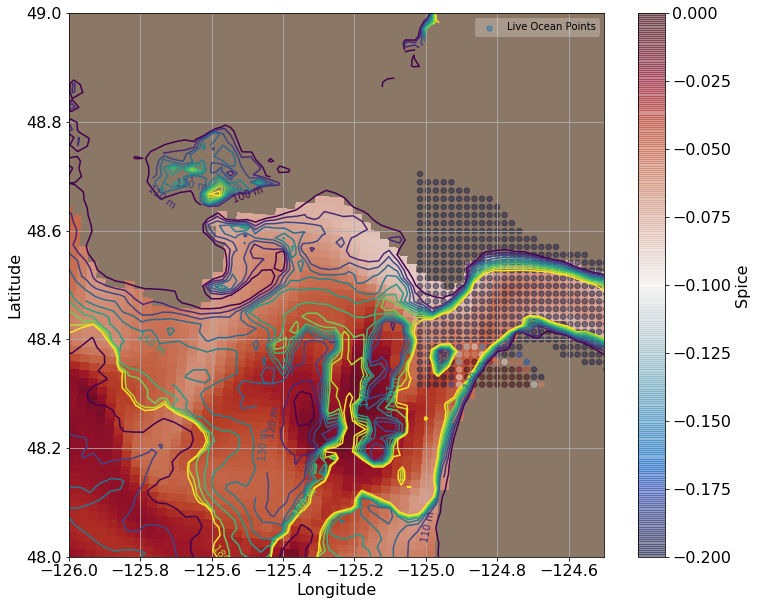

In [177]:
# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

# cmap = cmo.cm.deep_r

spic_rho = np.ma.masked_invalid(spic_rho)

cmap = cmo.cm.balance
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); #ax.grid()
CS = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice],np.arange(100,200,10))
CS1 = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice] , level = [0,100,200,500,1000])
CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=10)
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=10)

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

# p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
p = ax.pcolormesh(lon_wcvi,lat_wcvi,spic_rho, cmap = cmap, vmin = -0.2, vmax = 0)
# cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')




# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

q = ax.scatter(live_lon, live_lat, c=spic_rho_live[0,...], cmap = cmo.cm.balance,vmin = -0.2, vmax = 0, s=30, marker = 'o', alpha=0.5, label = 'Live Ocean Points')
# cbar = fig.colorbar(q, ax=ax)

# q = ax.scatter(NEP_lon, NEP_lat, c=spic_rho[...], cmap = cmo.cm.balance,vmin = -1, vmax = 0.2, s=10,  alpha=0.5, label = 'NEP36 Points')
legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)
cbar = fig.colorbar(q, ax=ax)
# cbar.ax.set_ylabel('Depth [m]', fontsize=16)

cbar.ax.set_ylabel('Spice', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

ax.set_ylim(48,49)
ax.set_xlim(-126,-124.5)

(-126, -124.5)

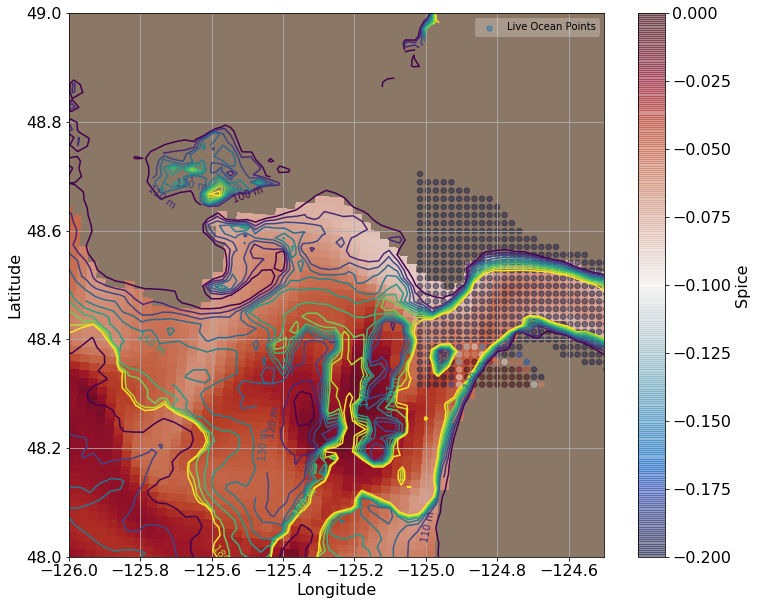

In [16]:
# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

# cmap = cmo.cm.deep_r

spic_rho = np.ma.masked_invalid(spic_rho)

cmap = cmo.cm.balance
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); #ax.grid()
CS = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice],np.arange(100,200,10))
CS1 = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice] , level = [0,100,200,500,1000])
CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=10)
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=10)

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

# p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
p = ax.pcolormesh(lon_wcvi,lat_wcvi,spic_rho, cmap = cmap, vmin = -0.2, vmax = 0)
# cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')




# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

q = ax.scatter(live_lon, live_lat, c=spic_rho_live[0,...], cmap = cmo.cm.balance,vmin = -0.2, vmax = 0, s=30, marker = 'o', alpha=0.5, label = 'Live Ocean Points')
# cbar = fig.colorbar(q, ax=ax)

# q = ax.scatter(NEP_lon, NEP_lat, c=spic_rho[...], cmap = cmo.cm.balance,vmin = -1, vmax = 0.2, s=10,  alpha=0.5, label = 'NEP36 Points')
legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)
cbar = fig.colorbar(q, ax=ax)
# cbar.ax.set_ylabel('Depth [m]', fontsize=16)

cbar.ax.set_ylabel('Spice', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

ax.set_ylim(48,49)
ax.set_xlim(-126,-124.5)

(-126, -124.5)

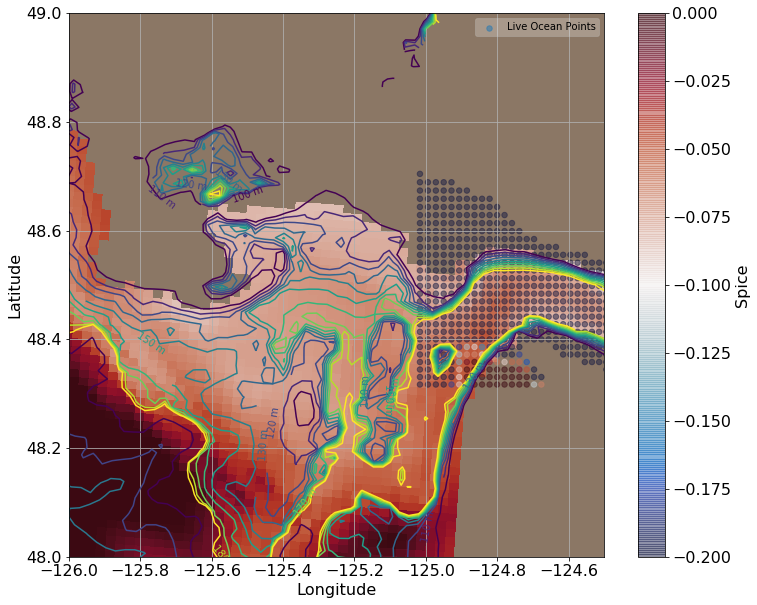

In [23]:
# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

# cmap = cmo.cm.deep_r

spic_rho = np.ma.masked_invalid(spic_rho)

cmap = cmo.cm.balance
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); #ax.grid()
CS = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice],np.arange(100,200,10))
CS1 = ax.contour(NEP_lon, NEP_lat, Z[y_wcvi_slice,x_wcvi_slice] , level = [0,100,200,500,1000])
CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=10)
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=10)

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

# p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
p = ax.pcolormesh(lon_wcvi,lat_wcvi,spic_rho, cmap = cmap, vmin = -0.2, vmax = 0)
# cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')




# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

q = ax.scatter(live_lon, live_lat, c=spic_rho_live[0,...], cmap = cmo.cm.balance,vmin = -0.2, vmax = 0, s=30, marker = 'o', alpha=0.5, label = 'Live Ocean Points')
# cbar = fig.colorbar(q, ax=ax)

# q = ax.scatter(NEP_lon, NEP_lat, c=spic_rho[...], cmap = cmo.cm.balance,vmin = -1, vmax = 0.2, s=10,  alpha=0.5, label = 'NEP36 Points')
legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)
cbar = fig.colorbar(q, ax=ax)
# cbar.ax.set_ylabel('Depth [m]', fontsize=16)

cbar.ax.set_ylabel('Spice', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

ax.set_ylim(48,49)
ax.set_xlim(-126,-124.5)

In [180]:
np.mean(live_sal)

<xarray.Variable ()>
array(32.65682721236967)

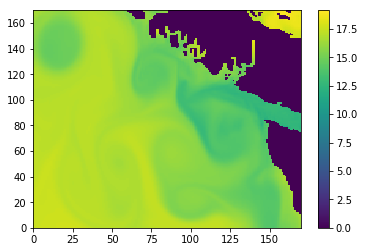

In [112]:
plt.pcolormesh(NEP_temp[0,...])
plt.colorbar()

In [17]:
y = np.empty_like(live_lon)
x = np.empty_like(live_lon)

for j in np.arange(live_lon.shape[0]):
    for i in np.arange(live_lon.shape[1]):
        y[j,i], x[j,i] = geo_tools.find_closest_model_point(np.float(live_lon[j,i]),\
                                                        np.float(live_lat[j,i]),NEP_lon,NEP_lat,tols=\
                                                        {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                                         'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        


In [46]:
model_NEP_comparison_spic = np.empty_like(y)

for j in np.arange(y.shape[0]):
    for i in np.arange(y.shape[1]):
        model_NEP_comparison_spic[j,i] = spic_rho[np.int(y[j,i]),np.int(y[j,i])]

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Warning: converting a masked element to nan.


In [47]:
spic_live_1 = spic_rho_live[0,...]

live_spic_comparison = spic_live_1[~np.isnan(model_NEP_comparison_spic)]
model_NEP_comparison_spic = model_NEP_comparison_spic[~np.isnan(model_NEP_comparison_spic)]

model_NEP_comparison_spic = model_NEP_comparison_spic[~np.isnan(live_spic_comparison)]
live_spic_comparison = live_spic_comparison[~np.isnan(live_spic_comparison)]

In [60]:
live_spic_comparison.shape

(488,)

In [63]:
model_NEP_comparison_spic.shape

(488,)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from scipy.stats import pearsonr
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [50]:
np.mean(live_spic_comparison)

-0.83694613692251563

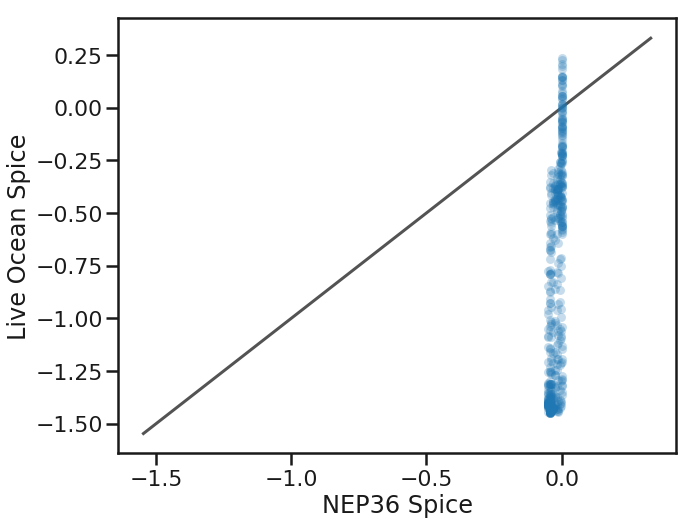

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

df =pd.DataFrame()

# df['Observed_Spice'] = survey_iso_spic_A
# df['Model_Spice'] = model_spic_A



df['NEP36 Spice'] = model_NEP_comparison_spic
df['Live Ocean Spice'] = live_spic_comparison


q = df.plot.scatter(x="NEP36 Spice", y="Live Ocean Spice",ax = ax, **plot_kwds)



lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# # ax.tick_params(axis='both',labelsize =16)

# q.set_axis_labels('Observed Spice', 'Model Spice')
# fig = q.fig
# fig.set_figwidth(10)
# fig.set_figheight(10)

/home/ssahu/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


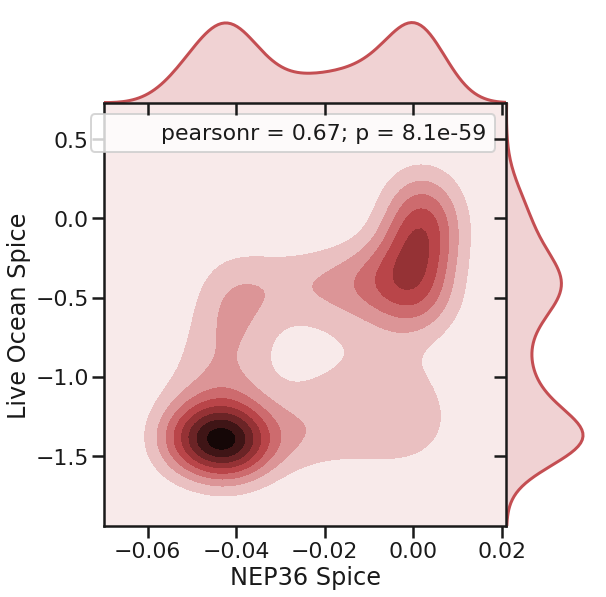

In [51]:



df =pd.DataFrame()

# df['Observed_Spice'] = survey_iso_spic_A
# df['Model_Spice'] = model_spic_A




df['NEP36 Spice'] = model_NEP_comparison_spic
df['Live Ocean Spice'] = live_spic_comparison


# fig, ax = plt.subplots(1,1, figsize=(10,8))

# q = df.plot.scatter(x="Observed_Spice", y="Model_Spice", ax = ax, alpha = 0.5)
# q = df.plot.hist2d(survey_iso_spic, model_spic, bins=(1, 1), cmap=plt.cm.Reds)
q = sns.jointplot(x="NEP36 Spice", y="Live Ocean Spice", data=df, legend='brief', kind="kde", space=0, color="r", sizes=(1,10), stat_func=pearsonr)


# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
ax.tick_params(axis='both',labelsize =16)

q.set_axis_labels('NEP36 Spice', 'Live Ocean Spice')

fig = q.fig
fig.set_figwidth(10)
fig.set_figheight(10)




In [56]:
def plot_clusters(ax, data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('bright', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax.scatter(survey_iso_spic, model_spic, c=colors, **plot_kwds)
    return labels, colors

In [53]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)


In [57]:
labels,colors = plot_clusters(df, cluster.KMeans, (), {'n_clusters':2})

TypeError: plot_clusters() missing 1 required positional argument: 'kwds'

TypeError: 'NoneType' object is not iterable

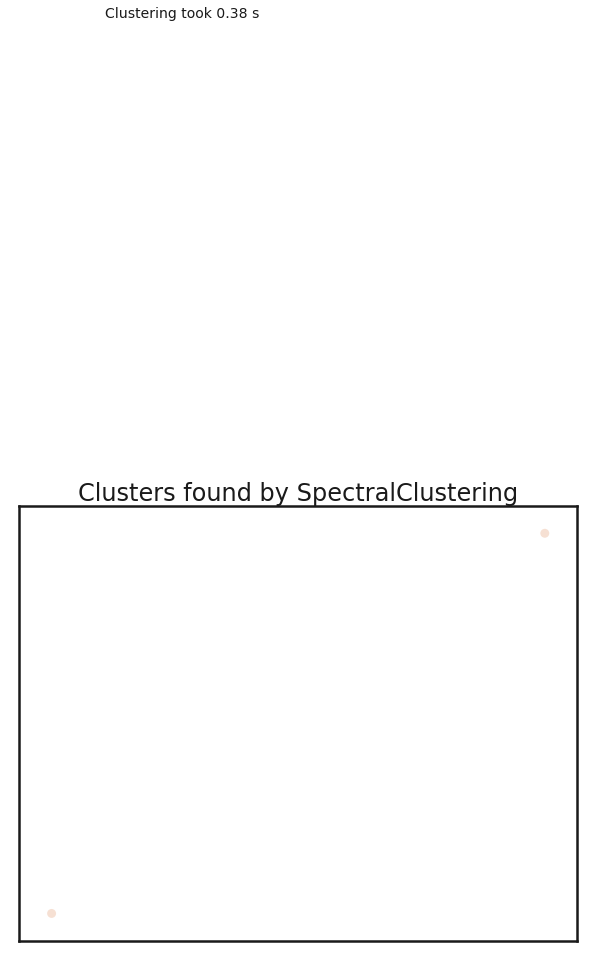

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

# q = plot_clusters(df, cluster.KMeans, (), {'n_clusters':3})

labels,colors = plot_clusters(df, cluster.SpectralClustering, (), {'n_clusters':2})
ax.set_xlabel("NEP36 Spice")
ax.set_ylabel("Live Ocean Spice")



In [170]:
for i in np.arange(lat_survey.shape[0]):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_survey[i],lat_survey[i],lon,lat,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

(170, 170)

In [171]:
NEP_lat.shape

(170, 170)

In [41]:
live_lat.shape

(31, 26)

In [42]:
live_lon.shape

(31, 26)